# **Diabetes Prediction Project**

The data chosen for this project is `Diabetes disease prediction` data taken from Kaggle [here](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset).and the combination returned some good features to predict `Diabetes` in patients. With this dataset, we'll end up with:

1. Exploratory Analysis and Preprocessing with the data
2. Supervised Learning (Regression)
3. Supervised Learning (Classification)

The original dataset had more features but this concised data is used for the right prediction of the disease in patients.

## Importing Dependencies

In [131]:
# Libraries for Data preprocessing and Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [46]:
# Regressor model from sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [47]:
# classification models from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [48]:
## Model evaluators

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

## **Part 1: Data Collection, Preprocessing and EDA**
# Load Data

In [49]:
file = pd.read_csv(filepath_or_buffer="CSV_DATA/diabetes_prediction_dataset.csv")

Lets check the shape of data

In [50]:
print(f"(Rows,Columns): {file.shape}")

(Rows,Columns): (100000, 9)


In [51]:
print(f"Dataset Features : {list(file.columns)}")

Dataset Features : ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


The given dataset has 100000 rows and 9 columns and their names are given above

Lets check the random sample of data

In [52]:
file.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
18988,Female,6.0,0,0,No Info,27.32,6.1,140,0
47249,Female,54.0,0,0,never,25.07,3.5,159,0
81004,Female,22.0,0,0,No Info,19.63,6.2,130,0
45141,Male,51.0,0,0,No Info,27.32,3.5,90,0
3465,Female,52.0,0,0,never,30.14,5.8,130,1
65451,Male,75.0,0,1,not current,27.32,5.8,140,0
97695,Female,3.0,0,0,No Info,16.50,6.0,159,0
59009,Female,63.0,0,0,not current,21.84,5.8,80,0
45729,Female,34.0,0,0,No Info,27.32,4.8,100,0
5903,Female,80.0,0,0,No Info,25.11,5.7,159,0


Lets check the first 5 samples of data

In [53]:
file.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Leta check the tail of data

In [54]:
file.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


## Exploratory Data Analysis

In [55]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Observation: info will tell information about the data How many columns are integers and how many are objects
Gender,smoking_hostory columns are objects
bmi,BhA1c_level,age is float
hypertension heart_disease blood glucose_level,diabetes are integer

### Statically view of Data

In [56]:
file.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Data Preprocessing

In [57]:
file.isna().sum()
#checking null values in the dataset

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Observation
There is no null values in the dataset

##### Checking duplicate rows in dataset

In [58]:
print(f"Total Duplicate Samples are :{file.duplicated().sum()}")

Total Duplicate Samples are :3854


#### Observation
There are total 3854 samples are duplicate we will remove these samples otherwise it will create
problems in training the dataste

In [59]:
# Deleting the duplicate rows
file.drop_duplicates(inplace=True)

In [60]:
print(f"Dataset's shape after removing Duplicates :{file.shape}")

Dataset's shape after removing Duplicates :(96146, 9)


### Checking Outliers

##### Observations:
Checking BMI value. It is very rare case to have BMi greater than 50.
So it is outlier we'll remove these rows

In [89]:
file[file['bmi']>50]

Droping the rows having bmi greater than 50

In [95]:
file = file.drop(file[file['bmi'] > 50].index)

In [ ]:
Checking the shape of file after removing rows having bmi more than 50

In [101]:
file.shape

(92189, 9)

#### Checking outliers in Blood_glucose_level
#### Observation
    According to the search maximum glucose level that a person can bear is 180 so rest all are outliers
    So i will remove the glucose level greater than 200

In [98]:
file[file['blood_glucose_level']>200]

(3179, 9)

In [99]:
file = file.drop(file[file['blood_glucose_level'] > 200].index)


Checking the shape after removing outliers of blood_glucose_level

In [100]:
file.shape

(92189, 9)

### Visualization of Data

Checking the value_counts() of smoking_history

In [104]:
file['smoking_history'].value_counts()

smoking_history
never          32863
No Info        32152
current         8739
former          8589
not current     6037
ever            3809
Name: count, dtype: int64

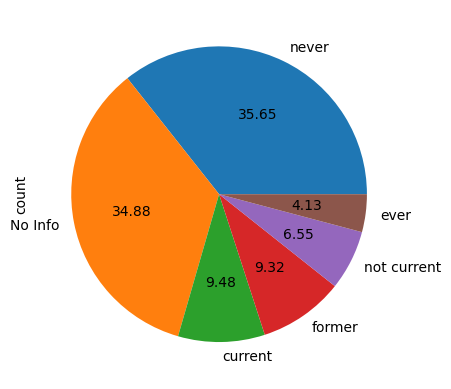

In [109]:
file['smoking_history'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

##### Checking the value_counts() of gender

In [110]:
file['gender'].value_counts()

gender
Female    53911
Male      38260
Other        18
Name: count, dtype: int64

##### PIE Chart for gender value counts()

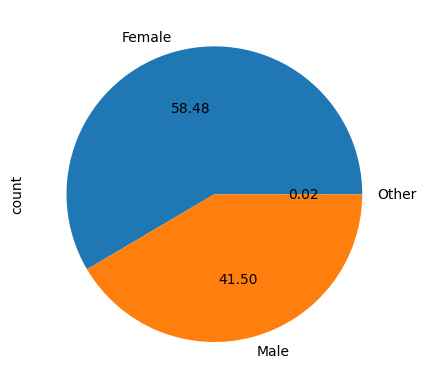

In [111]:
file['gender'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

##### Working on Age Checking  age

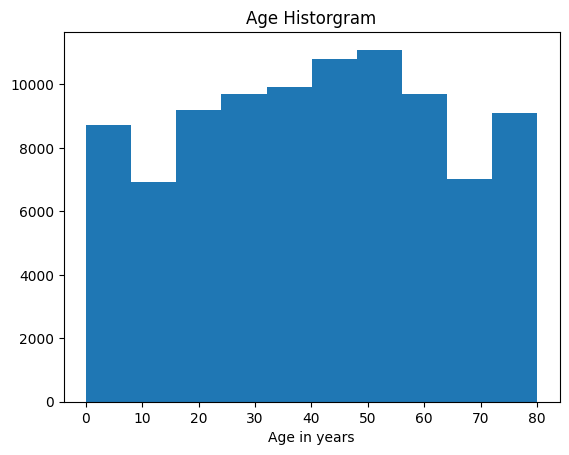

In [119]:
plt.hist(file['age'],bins=10)
plt.title("Age Historgram")
plt.xlabel("Age in years")
plt.show()

#### Checking the visualization of blood_glucose level and HbA1c_level on diabetes

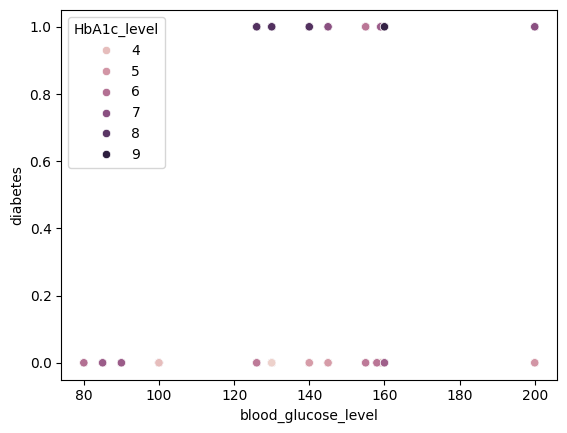

In [123]:
sns.scatterplot(data=file,x=file['blood_glucose_level'],y=file['diabetes'],hue=file['HbA1c_level'])
plt.show()

##### Checking what is effect of bmi on diabetes
##### Observation:
BMi has no effect on diabetes.ANy person with bmi ration may have diabetes

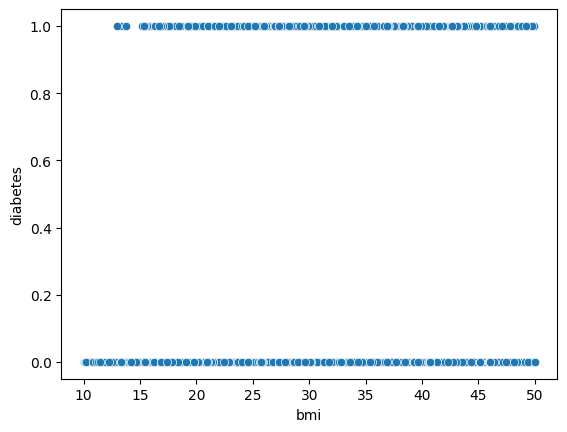

In [124]:
sns.scatterplot(data=file,x=file['bmi'],y=file['diabetes'])
plt.show()

/tmp/ipykernel_12721/3961184124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=file,x=file['gender'],y=file['diabetes'],palette='dark')


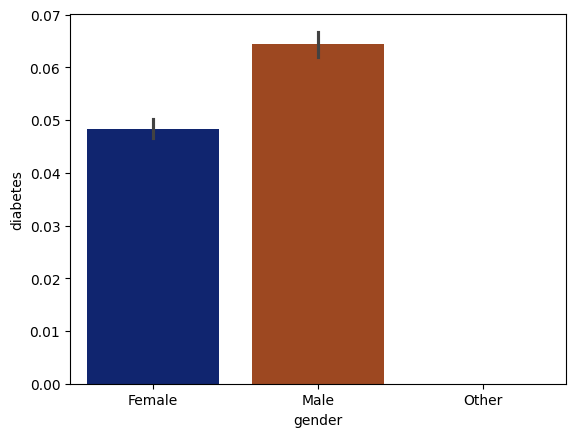

In [127]:
sns.barplot(data=file,x=file['gender'],y=file['diabetes'],palette='dark')
plt.show()

### Converting the Categorical Data into Numerical Data

In [132]:
label = LabelEncoder()
file['gender'] = label.fit_transform(file['gender'])
file['smoking_history'] = label.fit_transform(file['smoking_history'])

#### Correlation Matrix and Heatmap

In [134]:
corr_matrix = file.corr()

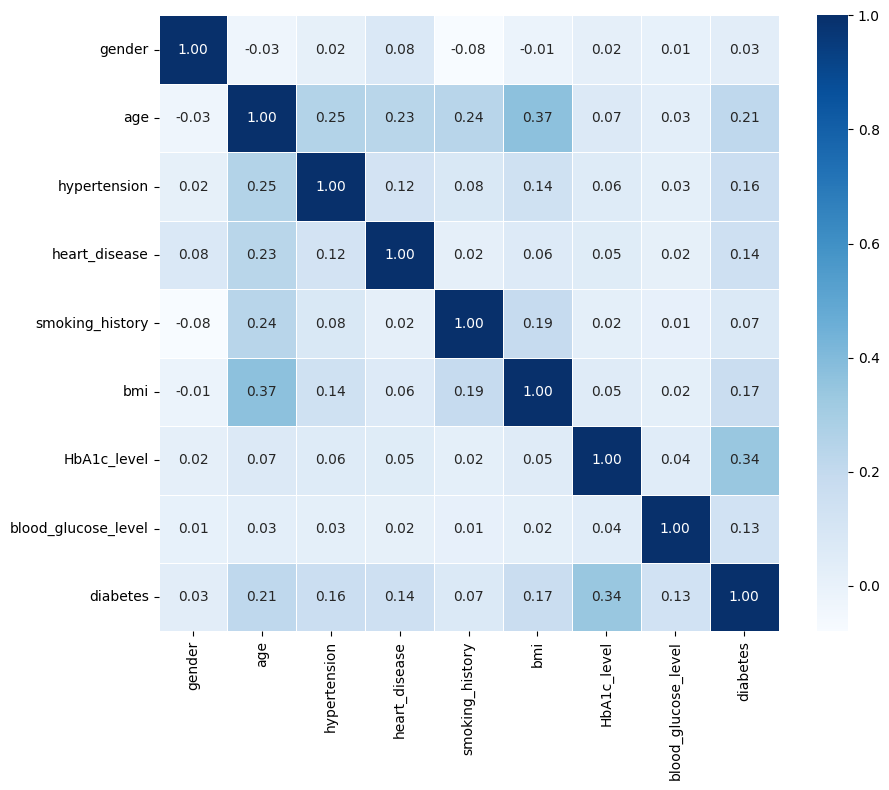

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.7, fmt=".2f", cmap="Blues")
plt.show()

##### Plotting Graphs Diabetes vs Blood_glucose_level,hypertension,smoking_hostory,bmi

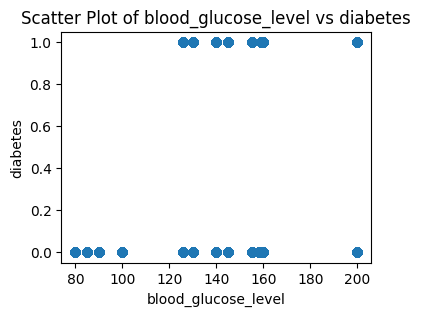

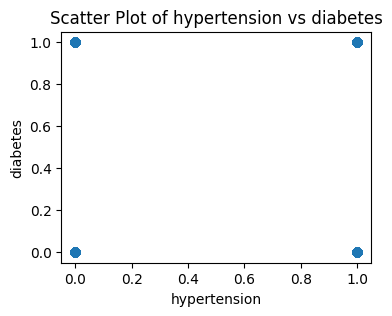

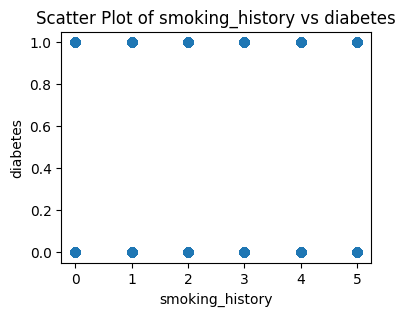

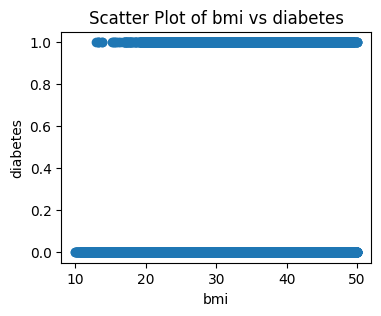

In [140]:
# from pandas.plotting import scatter_matrix
attributes = ['blood_glucose_level','hypertension','smoking_history','bmi']
y_attribute = 'diabetes'
for attribute in attributes:
    plt.figure(figsize=(4,3))
    plt.scatter(file[attribute], file[y_attribute])
    plt.xlabel(attribute)
    plt.ylabel(y_attribute)
    plt.title(f"Scatter Plot of {attribute} vs {y_attribute}")
    plt.show()

## Train test Split

In [142]:
# Split the data into features and labels
X = file.drop("diabetes", axis=1)
y = file['diabetes']

In [144]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [146]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [147]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Now 30% data will be used for testing purpose

### Data Transformation

In [151]:
# performing Data Transformation by scaling dataset

scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X_train)

# Just in-case if we need scaled test dataset
X_scaled_test = scalar.fit_transform(X_test)

In [152]:
X_scaled

array([[0.        , 0.4994995 , 0.        , ..., 0.59664916, 0.4       ,
        0.65      ],
       [0.5       , 0.21171171, 0.        , ..., 0.34058515, 0.56363636,
        0.16666667],
       [0.        , 0.67467467, 0.        , ..., 0.51487872, 0.23636364,
        0.65      ],
       ...,
       [0.5       , 0.8998999 , 1.        , ..., 0.87846962, 0.47272727,
        0.38333333],
       [0.        , 0.78728729, 0.        , ..., 0.68817204, 0.23636364,
        0.08333333],
       [0.        , 0.67467467, 0.        , ..., 0.38734684, 0.45454545,
        0.625     ]])

## Part 2.Supervised Learning

### Support Vector Regressor

In [153]:
SVR_model = SVR(kernel='sigmoid',
                C=1.0,
                epsilon=0.2)

SVR_model.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='sigmoid')

In [154]:
# Making predictions with SVR
svr_predictions = SVR_model.predict(X_test)

In [155]:
svr_predictions[:10]

array([-1644.9853845 ,   857.01383488,  -305.6769177 ,   436.21280425,
        -717.83316277,  -389.96952627,   808.53837153,  -356.71537371,
         160.75830518,   782.65807686])

##### Checking the Accuracy

In [156]:
# setting a threshold
threshold = 0.5
svr_predictions_binary = (svr_predictions >= threshold).astype(int)

accuracy = accuracy_score(y_test, svr_predictions_binary)
print(f"Accuracy with threshold : {round(accuracy,2) * 100}%")

Accuracy with threshold : 46.0%


#### Actual VS Model_predicted Accuracy

In [157]:
df_predictions = pd.DataFrame({'Actual': y_test, 'SVR_Predictions': svr_predictions_binary})
df_predictions.head()

,Actual,SVR_Predictions
96205,0,0
22747,0,1
86887,0,0
30205,0,1
13637,0,0


### Random Forest Regressor

In [158]:
RFR_model = RandomForestRegressor(n_estimators=300,
                                  max_depth=10,
                                  criterion="squared_error",
                                  random_state=0)

RFR_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=0)

**Model prediction**

In [159]:
RFR_predictions = RFR_model.predict(X_test)

**Model Accuracy**

In [160]:
threshold = 0.5
RFR_predictions_binary = (RFR_predictions >= threshold).astype(int)

RFR_accuracy = accuracy_score(y_test, RFR_predictions_binary)
print(f"RFR accuracy with threshold : {round(RFR_accuracy,2) * 100}%")

RFR accuracy with threshold : 97.0%


**Actual VS prediction**

In [161]:
df_RFR_predictions = pd.DataFrame({'Actual': y_test, 'RFR_Predictions': RFR_predictions_binary})
df_RFR_predictions.head()

,Actual,RFR_Predictions
96205,0,0
22747,0,0
86887,0,0
30205,0,0
13637,0,0


### Evaluation of Regression models

In [162]:
# SVR evaluation
SVR_MAE = mean_absolute_error(y_true=y_test, y_pred=svr_predictions)
SVR_MSE = mean_squared_error(y_true=y_test, y_pred=svr_predictions)
SVR_RMSE = np.sqrt(SVR_MSE)

In [163]:
print("Support Vector Regressor Evaluation\n")

print("Mean Absolute Error: ", SVR_MAE)
print("Mean Squared Error: ", SVR_MSE)
print("Root Mean Squared Error: ", SVR_RMSE)

Support Vector Regressor Evaluation

Mean Absolute Error:  600.9471209730839
Mean Squared Error:  529247.6634280027
Root Mean Squared Error:  727.4940985520108


In [164]:
# RFR evaluation

RFR_MAE = mean_absolute_error(y_test, RFR_predictions)
RFR_MSE = mean_squared_error(y_test, RFR_predictions)
RFR_RMSE = np.sqrt(RFR_MSE)

In [165]:
print("Random Forest Regressor Evaluation\n")

print("Mean Absolute Error : ", RFR_MAE)
print("Mean Squared Error : ", RFR_MSE)
print("Root Mean Squared Error : ", RFR_RMSE)

Random Forest Regressor Evaluation

Mean Absolute Error :  0.048400183487288036
Mean Squared Error :  0.023776660093791993
Root Mean Squared Error :  0.1541968225800778


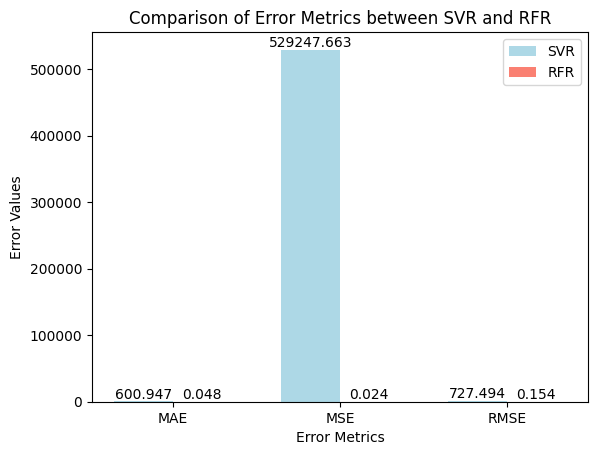

In [166]:
# visulaizing errors

svr_values = [SVR_MAE, SVR_MSE, SVR_RMSE]
rfr_values = [RFR_MAE, RFR_MSE, RFR_RMSE]

positions = np.arange(len(svr_values))
width = 0.35

fig, ax = plt.subplots()

svr_bars = ax.bar(positions - width/2, svr_values, width, label='SVR', color='lightblue')
rfr_bars = ax.bar(positions + width/2, rfr_values, width, label='RFR', color='salmon')

ax.set_xticks(positions)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE'])
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error Values')
ax.set_title('Comparison of Error Metrics between SVR and RFR')

for bars in [svr_bars, rfr_bars]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax.legend();

## Classification Models

In [172]:
RFC_model = RandomForestClassifier(n_estimators= 200,
                                  max_depth=10,
                                  min_samples_split= 5,
                                  max_features='sqrt')
RFC_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [173]:
# predicting target variable with LGR model on test data set
y_pred_RFC = RFC_model.predict(X_test)

In [176]:
RFC_accuracy = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy of Logistic Regression Classifier : {RFC_accuracy.round(2) * 100}%")

Accuracy of Logistic Regression Classifier : 97.0%


The Accuracy of Random ForestClassifer is 97%. This is performing very good over this large dataset

## Logistic Classifer Model

In [177]:
LGR_model = LogisticRegression(solver = 'liblinear',
                               random_state = 0,
                               max_iter = 1000)


LGR_model.fit(X_train, y_train)     # training model on training dataset

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [179]:
# predicting target variable with LGR model on test data set
y_pred_LGR = LGR_model.predict(X_test)

In [180]:
LGR_accuracy = accuracy_score(y_test, y_pred_LGR)
print(f"Accuracy of Logistic Regression Classifier : {LGR_accuracy.round(2) * 100}%")

Accuracy of Logistic Regression Classifier : 96.0%


The Accuracy of Logistic Regression is 96%. This is performing very good over this large dataset

## Catboost Classifier

In [181]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=10)

Learning rate set to 0.0887
0:	learn: 0.5015023	test: 0.5016183	best: 0.5016183 (0)	total: 60.3ms	remaining: 1m
10:	learn: 0.1093573	test: 0.1084540	best: 0.1084540 (10)	total: 161ms	remaining: 14.5s
20:	learn: 0.0889441	test: 0.0884845	best: 0.0884845 (20)	total: 276ms	remaining: 12.8s
30:	learn: 0.0855486	test: 0.0855443	best: 0.0855443 (30)	total: 376ms	remaining: 11.8s
40:	learn: 0.0838277	test: 0.0843019	best: 0.0843019 (40)	total: 480ms	remaining: 11.2s
50:	learn: 0.0827289	test: 0.0836467	best: 0.0836467 (50)	total: 584ms	remaining: 10.9s
60:	learn: 0.0820891	test: 0.0835093	best: 0.0835093 (60)	total: 694ms	remaining: 10.7s
70:	learn: 0.0814456	test: 0.0831641	best: 0.0831571 (68)	total: 822ms	remaining: 10.8s
80:	learn: 0.0810266	test: 0.0830281	best: 0.0830214 (79)	total: 966ms	remaining: 11s
90:	learn: 0.0803850	test: 0.0827856	best: 0.0827856 (90)	total: 1.12s	remaining: 11.2s
100:	learn: 0.0800166	test: 0.0827432	best: 0.0827289 (98)	total: 1.27s	remaining: 11.3s
110:	lear

In [183]:
catBoost_prediction = cat_model.predict(X_test)

In [185]:
catBoost_accuracy = accuracy_score(y_test, catBoost_prediction)
print(f"Accuracy of catboost  Classifier : {catBoost_accuracy.round(2) * 100}%")

Accuracy of catboost  Classifier : 97.0%


## XCG Classifier

In [193]:
xgb_model = XGBClassifier(random_state = 42)

XGB_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model to the training data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [195]:
y_pred_XGB = XGB_model.predict(X_test)

In [196]:
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy of XGB Classifier : {XGB_accuracy.round(2)*100}%")

Accuracy of XGB Classifier : 97.0%


### Comparing predicted values

In [197]:
# Predcition comparison for 10th row in test data set
print("LGR Predicted Value: " , y_pred_LGR[0] )
print("Actual True Value: " ,y_test.iloc[0])

LGR Predicted Value:  0
Actual True Value:  0


In [198]:
# Predcition comparison for 10th row in test data set

print("RFC Predicted Value: " , y_pred_RFC[10] )
print("Actual True Value: " ,y_test.iloc[10])

RFC Predicted Value:  0
Actual True Value:  0


In [199]:
df_LGR_predictions = pd.DataFrame({'Actual': y_test, 'LGR_Predictions': y_pred_LGR})
df_LGR_predictions.head()

,Actual,LGR_Predictions
96205,0,0
22747,0,0
86887,0,0
30205,0,0
13637,0,0


In [200]:
df_RFC_predictions = pd.DataFrame({'Actual': y_test, 'RFC_Predictions': y_pred_RFC})
df_RFC_predictions.head()

,Actual,RFC_Predictions
96205,0,0
22747,0,0
86887,0,0
30205,0,0
13637,0,0


### Evaluation of Classification Models

In [201]:
# Recall, Precision, F1 score of LGR model

LGR_recall = recall_score(y_test, y_pred_LGR)
LGR_precision = precision_score(y_test, y_pred_LGR)
LGR_f1 = f1_score(y_test, y_pred_LGR)

print("Recall score of Logistic Regressor : ", LGR_recall.round(2) )
print("Precision score of Logistic Regressor : ", LGR_precision.round(2) )
print("F1 score of Logistic Regressor : ", LGR_f1.round(2) )

Recall score of Logistic Regressor :  0.39
Precision score of Logistic Regressor :  0.84
F1 score of Logistic Regressor :  0.54


In [202]:
# Precision Accuracy Interval LGR

num_bootstrap_samples = 50

# array to store the accuracy scores
accuracy_scores = np.zeros(num_bootstrap_samples)

#  bootstrapping
for i in range(num_bootstrap_samples):

    X_bootstrap, y_bootstrap = resample(X_train, y_train)

    LGR_model.fit(X_bootstrap, y_bootstrap)
    y_pred = LGR_model.predict(X_test)

    accuracy_scores[i] = accuracy_score(y_test, y_pred)

# Calculating the confidence interval
lower_bound = np.percentile(accuracy_scores, 2.5)
upper_bound = np.percentile(accuracy_scores, 97.5)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

Accuracy: 96.38%
Confidence Interval: [0.9632, 0.9641]


#### Evaluation of RFC

In [203]:
# Recall, Precision, F1 score of LGR model

RFC_recall = recall_score(y_test, y_pred_RFC)
RFC_precision = precision_score(y_test, y_pred_RFC)
RFC_f1 = f1_score(y_test, y_pred_RFC)

print("Recall score of RandomForest Classifer : ", RFC_recall.round(2))
print("Precision score of RandomForest Classifer : ", RFC_precision.round(2))
print("F1 score of RandomForest Classifer : ", RFC_f1.round(2))

Recall score of RandomForest Classifer :  0.46
Precision score of RandomForest Classifer :  1.0
F1 score of RandomForest Classifer :  0.63


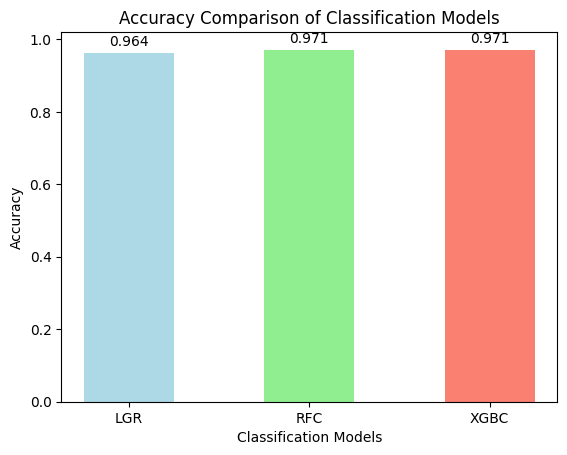

In [205]:
accuracy_scores = [LGR_accuracy, RFC_accuracy, XGB_accuracy]
models = ['LGR', 'RFC', 'XGBC',]

plt.bar(models, accuracy_scores, color=['lightblue', 'lightgreen', 'salmon'], width=0.5)

plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')

plt.show();

## Conclusion

After Exploratery Data analysis,visualization and model implementation,now its time to summerize the dataset.In this project there is  a comprehensive analysis of predicting diabetes disease among patients, based on some key features and attributes such as hypertension,Blood_glucose_level,Bmi,haemoglobin,gender and some other feaatures. Through pre-processing data, performing necessary EDA to find relevancy and important insights about the data, following regression and classification. Compare and contrast the performance of different models and methods. Key insights emerged during the process, identifying age and BMI weighed with highest feature importance in our dataset. 

Supervised learning models, including Support Vector Regression (SVR) and Random Forest Regression (RFR), showcased distinct performances. SVR, while yielding accurate predictions, exhibited a higher mean absolute error (MAE) and root mean squared error (RMSE) compared to RFR.

The classification phase introduced Logistic Regression, Random Forest Classifier,catboost Classifier and XGB Classifier, where XGB and catboost demonstrated superior accuracy. The accuracy results of Logistic Regression  was also very good, I used XGB and catboost Classifier and manually initialized parameters with hyper parameter tuning, which performed better than both LGR and RFC models. .Their Accuracy level are almost 96-97%

TIn conclusion, our analysis scores the intricate interplay of features in diabetes disease prediction, emphasizing the importance of thoughtful model selection and the continuous pursuit of refining methodologies for more accurate and actionable insights in the realm of healthcare analytics.
